<a href="https://colab.research.google.com/github/miguealejandror/-covidvaccination/blob/main/An%C3%A1lisis_de_Datos_de_Vacunaci%C3%B3n_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Proyecto Final – Análisis de datos de Vacunación Covid 19**


In [ ]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(host="", database="", user="", password="")

In [ ]:
vaccinations_df = pd.read_sql_query('select * from tb_vaccinations',conn)

In [ ]:
vaccinations_df = pd.DataFrame(vaccinations_df,columns=['country','iso_code', 'date', 'total_vaccinations',	'people_vaccinated',	'people_fully_vaccinated',	'daily_vaccinations_raw',	'daily_vaccinations',	'total_vaccinations_per_hundred',	'people_vaccinated_per_hundred',	'people_fully_vaccinated_per_hundred',	'daily_vaccinations_per_million'	,'vaccines',	'source_name',	'source_website'])

In [ ]:
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32903,Zimbabwe,ZWE,7/18/2021,1785533.0,1144379.0,641154.0,14099.0,42019.0,12.01,7.70,4.31,2827.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1418301580...
32904,Zimbabwe,ZWE,7/19/2021,1827638.0,1184435.0,643203.0,42105.0,42253.0,12.30,7.97,4.33,2843.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1418301580...
32905,Zimbabwe,ZWE,7/20/2021,1897337.0,1247494.0,649843.0,69699.0,45971.0,12.77,8.39,4.37,3093.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1418301580...
32906,Zimbabwe,ZWE,7/21/2021,1949472.0,1292642.0,656830.0,52135.0,47976.0,13.12,8.70,4.42,3228.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1418301580...


In [ ]:
# vaccinations_df = vaccinations_df.drop(index=0)

In [ ]:
# vaccinations_df = pd.read_csv('/content/country_vaccinations.csv')

In [ ]:
# manufacturer_df = pd.read_csv('/content/country_vaccinations_by_manufacturer.csv')

In [ ]:
manufacturer_df = pd.read_sql_query('select * from tb_manufacturer',conn)

In [ ]:
manufacturer_df = pd.DataFrame(manufacturer_df,columns=['location', 'date','vaccine','total_vaccinations'])

In [ ]:
manufacturer_df

,location,date,vaccine,total_vaccinations
0,Austria,1/8/2021,Johnson&Johnson,0
1,Austria,1/8/2021,Moderna,0
2,Austria,1/8/2021,Oxford/AstraZeneca,0
3,Austria,1/8/2021,Pfizer/BioNTech,30986
4,Austria,1/15/2021,Johnson&Johnson,0
...,...,...,...,...
9776,Uruguay,7/23/2021,Pfizer/BioNTech,1395789
9777,Uruguay,7/23/2021,Sinovac,3181911
9778,Uruguay,7/24/2021,Oxford/AstraZeneca,80503
9779,Uruguay,7/24/2021,Pfizer/BioNTech,1398614


In [ ]:
vaccinations_df.fillna(value=0, inplace=True)
date = vaccinations_df.date.str.split('/', expand=True)
date

,0,1,2
0,2,22,2021
1,2,23,2021
2,2,24,2021
3,2,25,2021
4,2,26,2021
...,...,...,...
32903,7,18,2021
32904,7,19,2021
32905,7,20,2021
32906,7,21,2021


In [ ]:
vaccinations_df['year'] = date[0]
vaccinations_df['month'] = date[1]
vaccinations_df['day'] = date[2]

vaccinations_df.year = pd.to_numeric(vaccinations_df.year)
vaccinations_df.month = pd.to_numeric(vaccinations_df.month)
vaccinations_df.day = pd.to_numeric(vaccinations_df.day)

vaccinations_df.date = pd.to_datetime(vaccinations_df.date)

vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2,22,2021
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2,23,2021
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2,24,2021
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2,25,2021
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2,26,2021


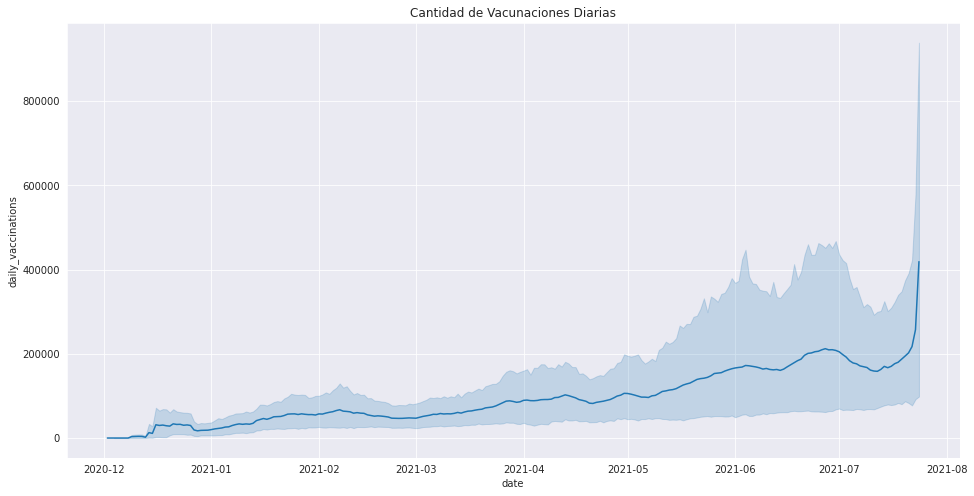

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=vaccinations_df.date, y=vaccinations_df.daily_vaccinations)
plt.title('Cantidad de Vacunaciones Diarias')
plt.show()

In [ ]:
countries = vaccinations_df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= vaccinations_df.columns)
for country in countries:
  top_countries = top_countries.append(vaccinations_df.loc[vaccinations_df['country'] == country])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


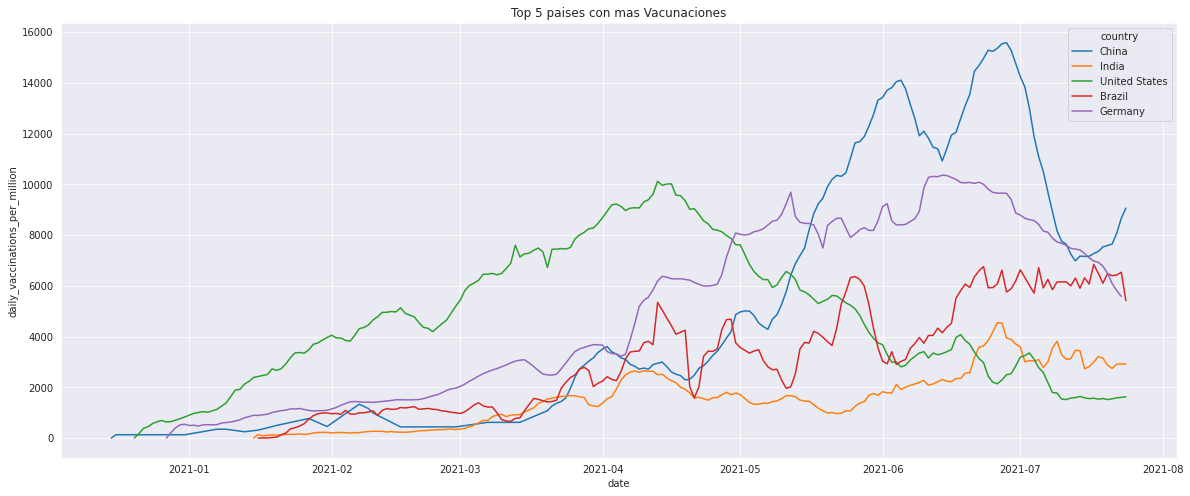

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], 
             top_countries['daily_vaccinations_per_million'], 
             hue= top_countries['country'], ci= False)
plt.title('Top 5 paises con mas Vacunaciones');

In [ ]:
fully_vaccinated = vaccinations_df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)

In [ ]:
fully_vaccinated.reset_index()

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,162725812.0
2,India,92763169.0
3,Germany,40816711.0
4,Brazil,37145993.0
5,United Kingdom,36953691.0
6,England,30909329.0
7,France,29774321.0
8,Japan,29384382.0
9,Italy,28934137.0


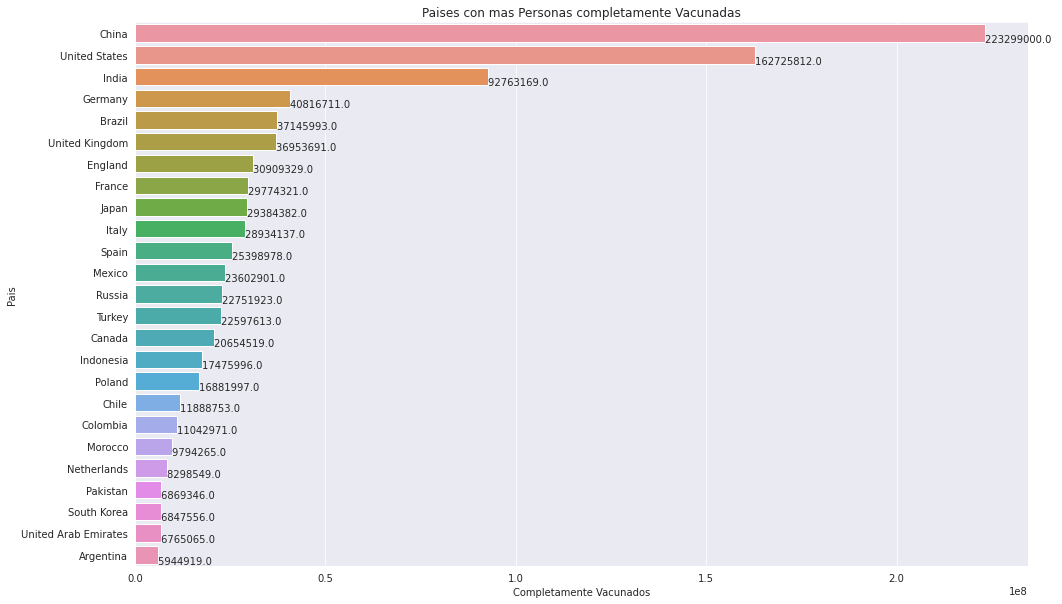

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel("Completamente Vacunados")
plt.ylabel("Pais");
plt.title('Paises con mas Personas completamente Vacunadas');

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

In [ ]:
Panama_df = vaccinations_df[vaccinations_df['country'] == 'Panama']
Panama_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
22904,Panama,PAN,2021-01-20,641.0,641.0,0.0,0.0,0.0,0.01,0.01,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,1,20,2021
22905,Panama,PAN,2021-01-21,2728.0,2728.0,0.0,2087.0,2087.0,0.06,0.06,0.00,484.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,1,21,2021
22906,Panama,PAN,2021-01-22,5081.0,5081.0,0.0,2353.0,2220.0,0.12,0.12,0.00,515.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,1,22,2021
22907,Panama,PAN,2021-01-23,5594.0,5594.0,0.0,513.0,1651.0,0.13,0.13,0.00,383.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,1,23,2021
22908,Panama,PAN,2021-01-24,6420.0,6420.0,0.0,826.0,1445.0,0.15,0.15,0.00,335.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,1,24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23086,Panama,PAN,2021-07-20,1890415.0,1226715.0,663700.0,13406.0,18129.0,43.81,28.43,15.38,4202.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,7,20,2021
23087,Panama,PAN,2021-07-21,1911404.0,1241588.0,669816.0,20989.0,18552.0,44.30,28.78,15.52,4300.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,7,21,2021
23088,Panama,PAN,2021-07-22,1975276.0,1300265.0,675011.0,63872.0,23608.0,45.78,30.14,15.64,5471.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,7,22,2021
23089,Panama,PAN,2021-07-23,2066597.0,1384491.0,682106.0,91321.0,32101.0,47.90,32.09,15.81,7440.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/MINSAPma/status/1419134309...,7,23,2021


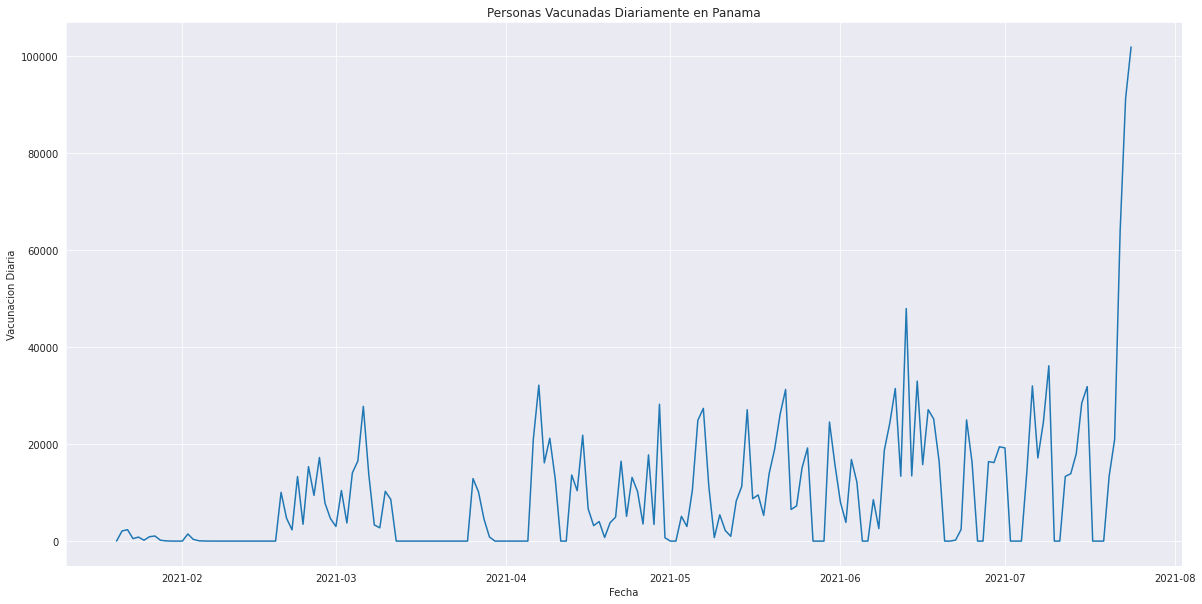

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x=Panama_df.date, y=Panama_df.daily_vaccinations_raw)
plt.xlabel("Fecha")
plt.ylabel("Vacunacion Diaria")
plt.title('Personas Vacunadas Diariamente en Panama');

In [ ]:
vaccine_location = manufacturer_df.groupby(["vaccine"])["total_vaccinations"].max().sort_values(ascending= False).head(25)

In [ ]:
vaccine_location.reset_index()

,vaccine,total_vaccinations
0,Pfizer/BioNTech,189943803
1,Moderna,137610667
2,Sinovac,18338229
3,Johnson&Johnson,13191298
4,Oxford/AstraZeneca,12376166
5,Sinopharm/Beijing,2086559
6,Sputnik V,1812976
7,CanSino,497237


Text(0.5, 1.0, 'Cantidad de Vacunas aplicada por Fabricante')

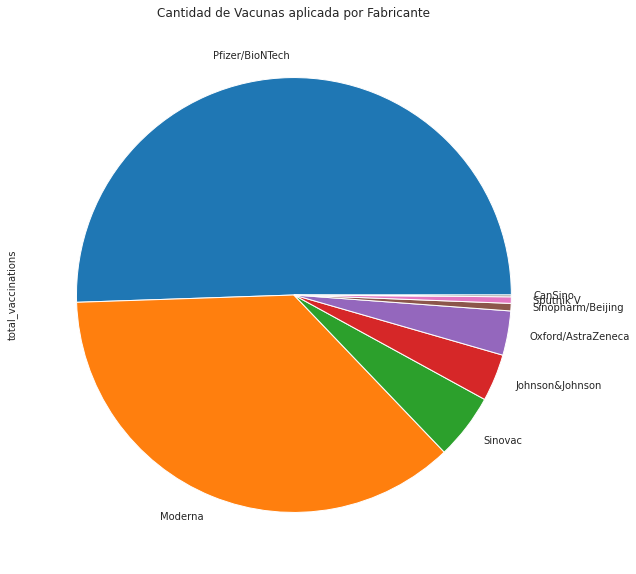

In [ ]:
g = vaccine_location.plot.pie(y='vaccine', figsize=(10, 10))
g.set_title("Cantidad de Vacunas aplicada por Fabricante")

In [ ]:
usa_df = manufacturer_df[manufacturer_df['location'] == 'United States']
usa_df

,location,date,vaccine,total_vaccinations
8826,United States,1/12/2021,Moderna,3835859
8827,United States,1/12/2021,Pfizer/BioNTech,5488697
8828,United States,1/13/2021,Moderna,4249795
8829,United States,1/13/2021,Pfizer/BioNTech,6025872
8830,United States,1/15/2021,Moderna,5122662
...,...,...,...,...
9332,United States,7/23/2021,Moderna,137451139
9333,United States,7/23/2021,Pfizer/BioNTech,189462460
9334,United States,7/24/2021,Johnson&Johnson,13191298
9335,United States,7/24/2021,Moderna,137610667


In [ ]:
usa_vaccine = usa_df.groupby(["vaccine"])["total_vaccinations"].max().sort_values(ascending= False).head(25)

In [ ]:
usa_vaccine.reset_index()

,vaccine,total_vaccinations
0,Pfizer/BioNTech,189943803
1,Moderna,137610667
2,Johnson&Johnson,13191298


Text(0.5, 1.0, 'Cantidad de Vacunas aplicada por Fabricante en Estados Unidos')

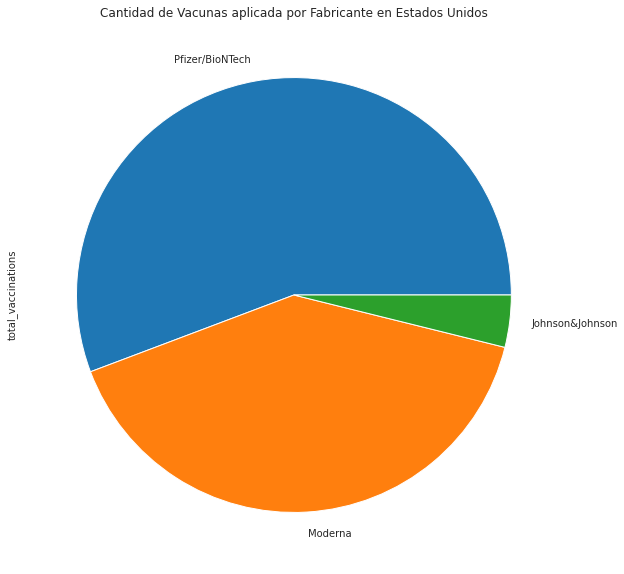

In [ ]:
g_usa = usa_vaccine.plot.pie(y='vaccine', figsize=(10, 10))
g_usa.set_title("Cantidad de Vacunas aplicada por Fabricante en Estados Unidos")